## Calculating the Return of a Portfolio of Securities

Download data for a portfolio composed of 5 stocks. Do it for British Petroleum, Ford, Exxon, Lincoln, and Apple for the period ‘2000-1-1’ until today.

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

c:\users\bigdata\documents\python scripts\udemy-python-4-finance\pyfin\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
tickers = ['BP', 'F', 'XOM', 'LNC', 'AAPL']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2000-1-1')['Adj Close']

### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method). 

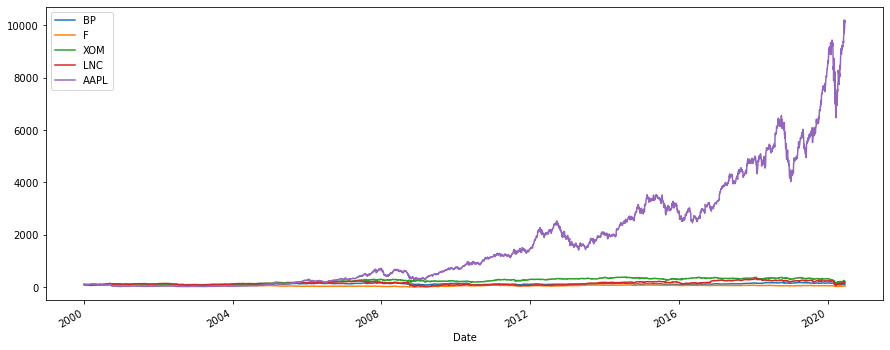

In [3]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6))
plt.show()

How would you interpret the behavior of the stocks? Just by looking at the chart, would you be able to create a portfolio that provides a solid return on investment?

*****

### Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [4]:
returns = mydata.pct_change()

First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [7]:
weights = np.ones_like(tickers).astype(float)/len(tickers)

Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

In [10]:
annual_rates = returns.mean() * 250
annual_rates

BP      0.044938
F       0.044743
XOM     0.070016
LNC     0.168168
AAPL    0.310065
dtype: float64

In [11]:
annual_rates.dot(weights)

0.12758588347501765

Transform the result into a percentage form. 

In [13]:
pfolio_1 = str(round(annual_rates.dot(weights), 4) * 100) + ' %'
print(pfolio_1)

12.76 %


Is the return of this portfolio satisfactory?